In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

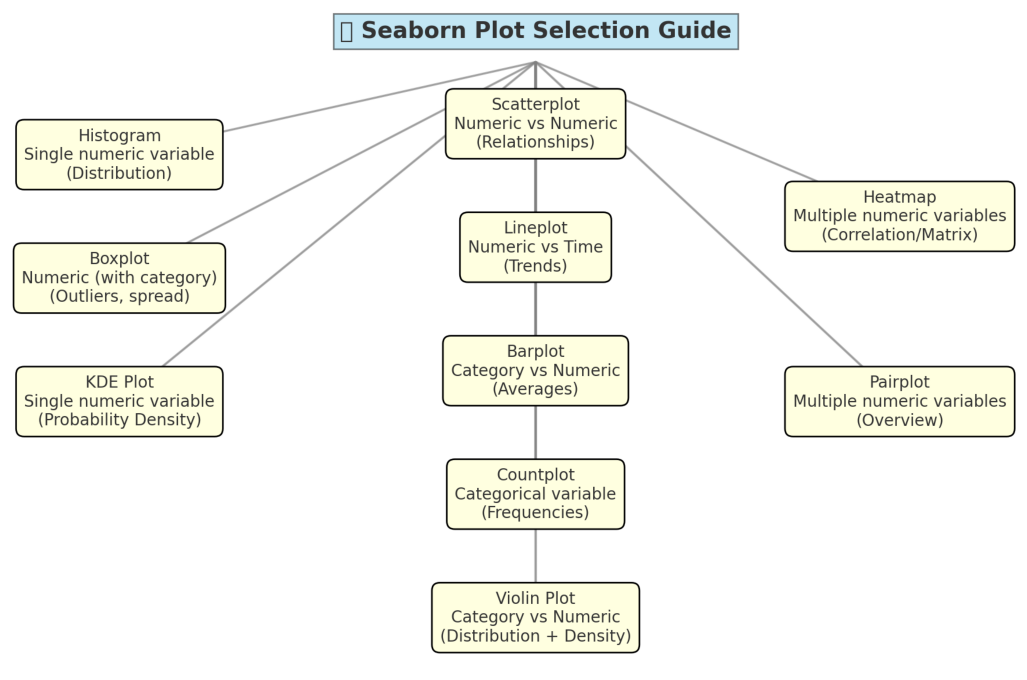

In [11]:
plt.figure(figsize=(13,15))
image = mpimg.imread('seabornplots.PNG')
plt.axis('off')
plt.imshow(image)
plt.show()

## <span style="color:red">importing data</span>

In [18]:
df = pd.read_excel('financial data.xlsx')

In [19]:
df.head()

,CustomerID,Monthly_Income,Loan_Amount,Credit_Score,Transaction_Amount,Region
0,1,54967.141530,269967.771829,616.241086,1046.096221,West
1,2,48617.356988,246231.684146,642.774066,1569.807495,East
2,3,56476.885381,202981.518496,610.379004,1793.197233,South
3,4,65230.298564,167653.161115,634.601924,2943.843829,West
4,5,47658.466253,234911.165681,555.319267,2278.276562,West


## ⚡ Suggested Workflow for Insights
- **Univariate Analysis** → Histograms, Boxplots (find outliers).
- **Bivariate Analysis** → Scatterplots, Barplots (income vs loan, credit score vs loan).
- **Multivariate Analysis** → Pairplot, Heatmap (overall trends).
- **Categorical Comparisons** → Barplot, Countplot, Violin (regions)

# <span style="color:orange">**Univariate Analysis**</span>

## <span style="color:red">Histogram / KDE Plot</span>

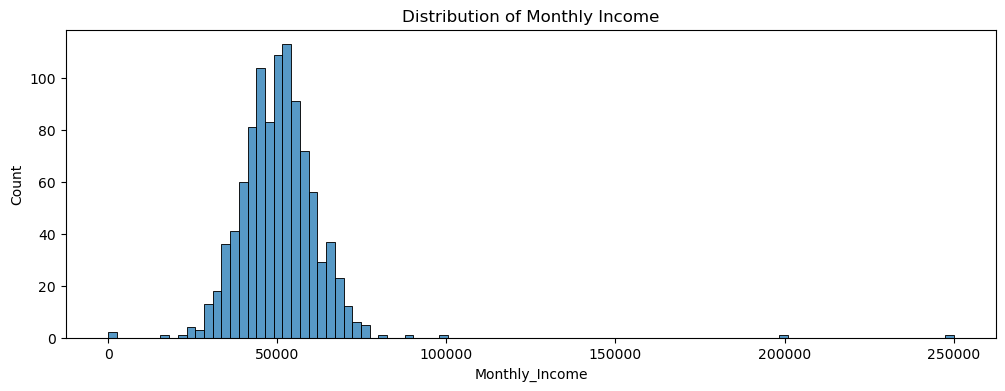

In [34]:
plt.figure(figsize=(12,4))
sns.histplot(df['Monthly_Income'])
plt.title("Distribution of Monthly Income")
plt.show()

## <span style="color:red">KDE Plot</span>

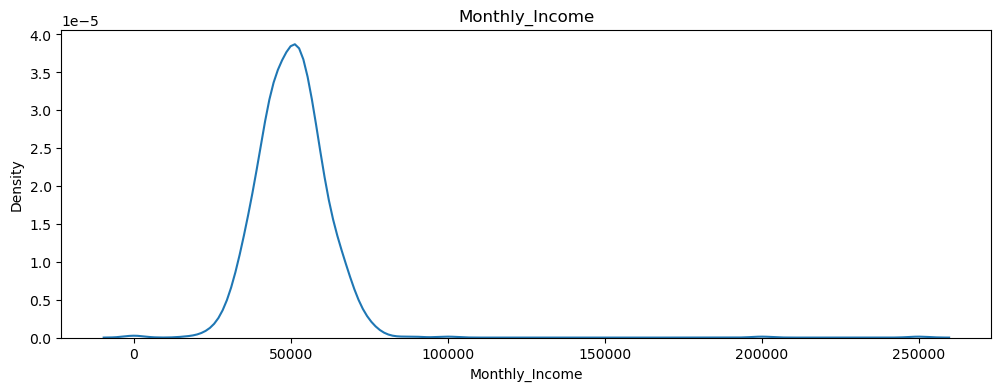

In [61]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['Monthly_Income'])
plt.title('Monthly_Income')
plt.show()

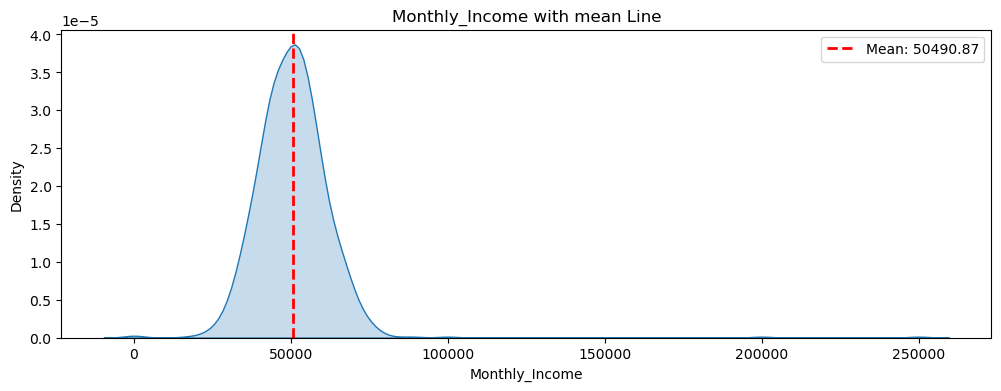

In [62]:
plt.figure(figsize=(12,4))
sns.kdeplot(df['Monthly_Income'], fill=True)
# Calculate mean
mean_income = df['Monthly_Income'].mean()
# Add vertical line at mean
plt.axvline(mean_income, color='red', linestyle='--', linewidth=2, label=f"Mean: {mean_income:.2f}")
plt.title('Monthly_Income with mean Line')
plt.legend()
plt.show()

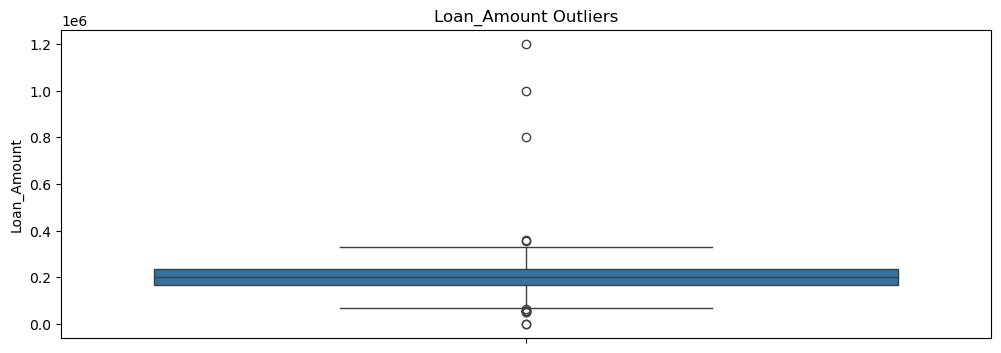

In [44]:
plt.figure(figsize=(12,4))
sns.boxplot(df['Loan_Amount'])
plt.title('Loan_Amount Outliers')
#plt.yticks(rotation=45) 
plt.show()

In [55]:
Q1 = df['Loan_Amount'].quantile(0.25)
Q2 = df['Loan_Amount'].quantile(0.50)
Q3 = df['Loan_Amount'].quantile(0.75)
IQR = Q3-Q1
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)
print('IQR:',IQR)

Q1: 169608.9006452784
Q2: 203223.720740506
Q3: 236743.8893024909
IQR: 67134.9886572125


In [60]:
lower_outlier = Q1-1.5*IQR
upper_outlier = Q3+1.5*IQR
print('lower_outlier:',lower_outlier)
print('upper_outlier:',upper_outlier)

lower_outlier: 68906.41765945965
upper_outlier: 337446.3722883096


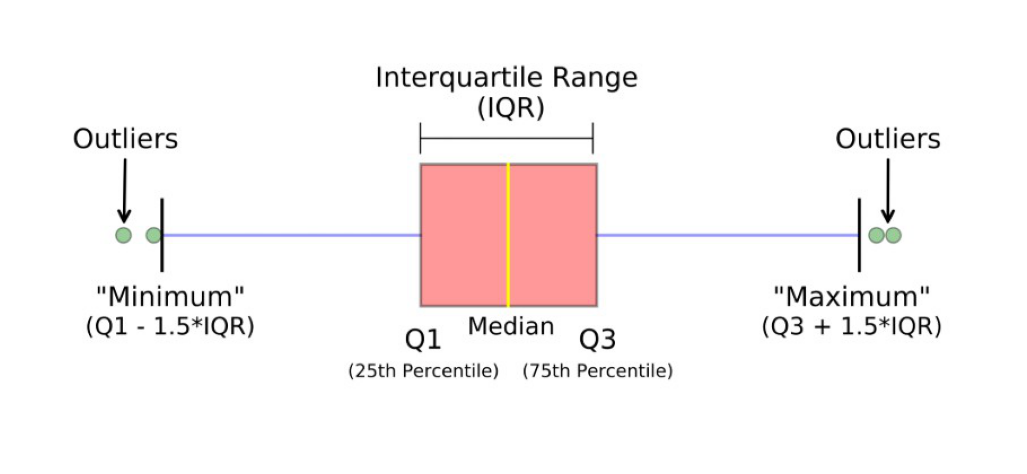

In [45]:
plt.figure(figsize=(13,15))
image = mpimg.imread('boxplot.jpg')
plt.axis('off')
plt.imshow(image)
plt.show()

# <span style="color:orange">**Bivariate Analysis**</span>

## <span style="color:red">Scatterplots</span>

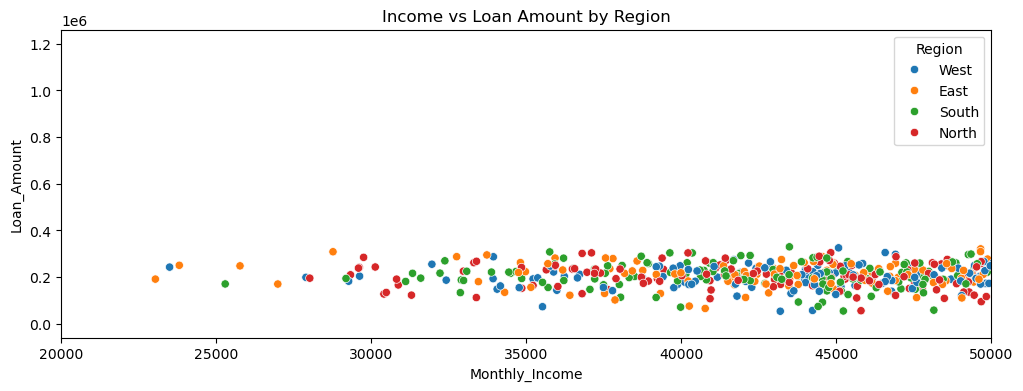

In [73]:
# Insight: See if higher income customers take bigger loans.
plt.figure(figsize=(12,4))
sns.scatterplot(data=df,x='Monthly_Income',y='Loan_Amount',hue='Region')
plt.title("Income vs Loan Amount by Region")
plt.xlim(20000,50000)
plt.show()

## <span style="color:red">Bar Plot</span>

- Bar Plot (sns.barplot)
- **What it shows:**
   - The mean (average) of a numerical variable for each category.
- **Use case:**
   - When you have categorical vs numerical data and want to compare the average values.
- **Default behavior:**
   - Shows error bars (95% confidence intervals by default)

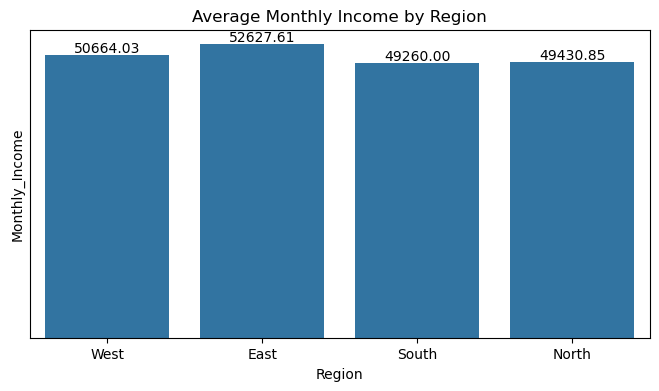

In [101]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=df, x='Region', y='Monthly_Income', errorbar=None,orient='v')
plt.title("Average Monthly Income by Region")
# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")  # %.0f = no decimal
plt.yticks([])
plt.show()

## <span style="color:red">Count Plot</span>

- Count Plot (sns.countplot)
  - What it shows:
- The frequency (count) of each category.
- Use case:
  - When you have categorical data only and want to see how many observations are in each group

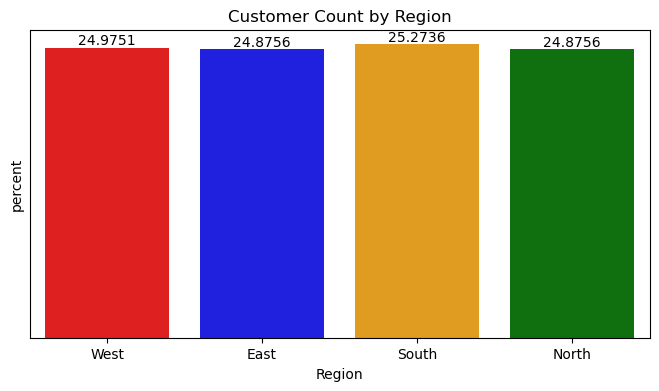

In [99]:
plt.figure(figsize=(8,4))
my_colors = ['red','blue','orange','green']
ax = sns.countplot(data=df,x='Region',palette=my_colors,hue='Region',orient='h',stat='percent')

for container in ax.containers:
    ax.bar_label(container)  
    
plt.yticks([])
plt.title("Customer Count by Region")
plt.show()

## <span style="color:red">violinplot</span>

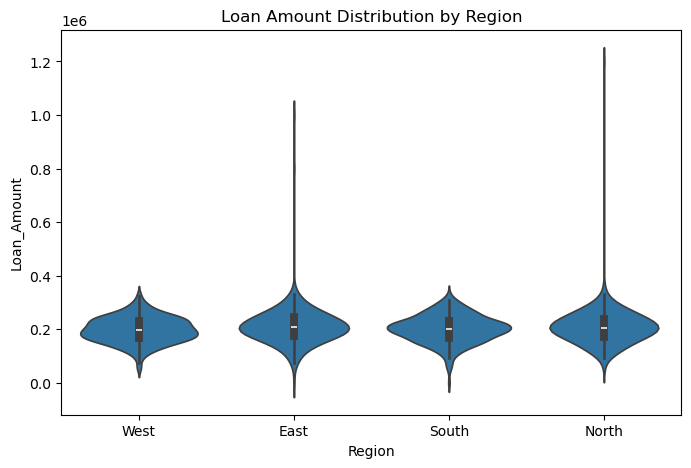

In [102]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Region', y='Loan_Amount')
plt.title("Loan Amount Distribution by Region")
plt.show()

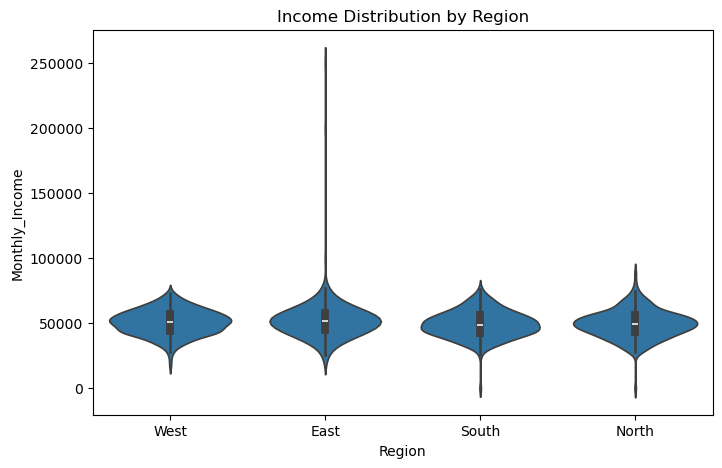

In [104]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='Region', y='Monthly_Income')
plt.title("Income Distribution by Region")
plt.show()

# pairplot

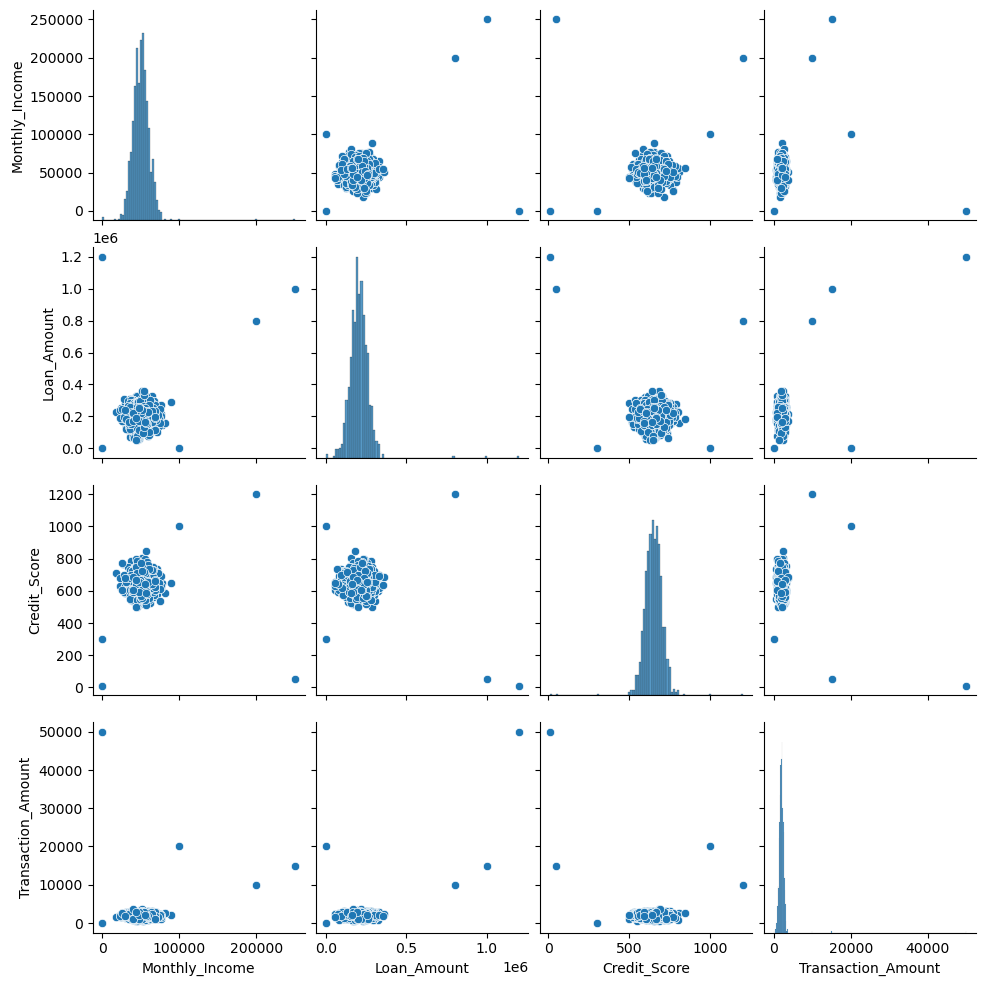

In [108]:
sns.pairplot(df[["Monthly_Income","Loan_Amount","Credit_Score","Transaction_Amount"]])
plt.show()

# Correlation & Heatmap

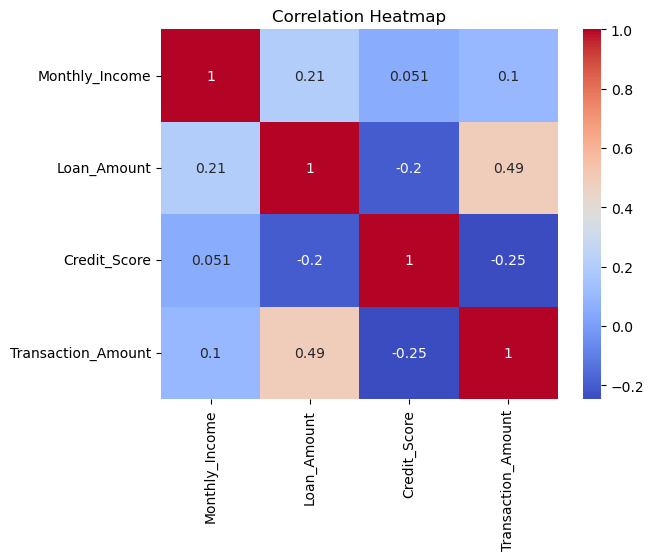

In [110]:
corr = df[["Monthly_Income","Loan_Amount","Credit_Score","Transaction_Amount"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# swarmplot

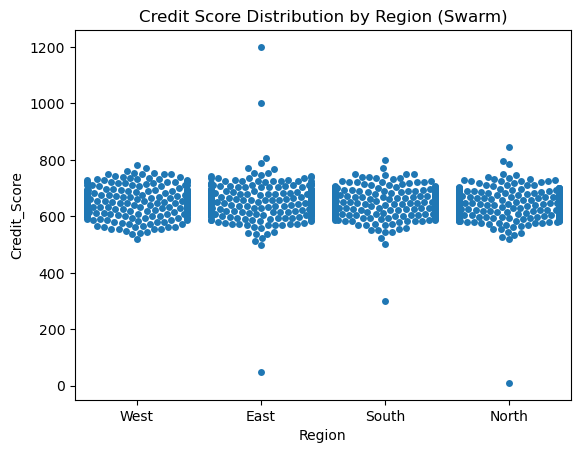

In [116]:
sns.swarmplot(x="Region", y="Credit_Score", data=df)
plt.title("Credit Score Distribution by Region (Swarm)")
plt.show()

# distplot

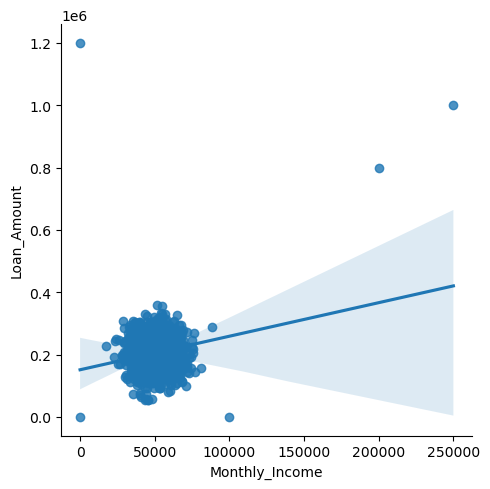

In [122]:
sns.lmplot(x="Monthly_Income", y="Loan_Amount", data=df)
plt.show()